<a href="https://colab.research.google.com/github/Thiago24041985/projeto-python/blob/main/notebook79b6b0ce28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO FINAL DO MODOLO PYTHON DA EBAC EM CIÊNCIA DE DADOS

Analise de comportamente de clientes para aumento do limite de credito¶

importando as bbibliotecas


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

Este projeto tem por objetivo detectar padroes de comportamento que permitam o aumento do limite de creditos dos clientes adimplentes

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')


In [ ]:
df.head(10)


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Estrutura¶

In [ ]:
df.shape #quantidade de linha e quantidade de colunas


(10127, 16)

In [ ]:
df[df['default'] == 0].shape #quantidade de linha e quantidade de colunas de clientes adimplentes


(8500, 16)

In [ ]:
df[df['default'] == 1].shape  #quantidade de linha e quantidade de colunas de clientes inadimplentes


(1627, 16)

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape


In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")


A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Schema¶

In [ ]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Colunas e tipos de dados

In [ ]:
df.dtypes


id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

atributos categoricos

In [ ]:
df.select_dtypes('object').describe().transpose()


,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Atributos numericos

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Dados faltantes¶


In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28



Verificando quais colunas possuem dados faltantes


In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Estatisticas sobre os dados faltantes

In [ ]:
def dados_faltantes(df: pd.DataFrame) -> None:

   dados_faltantes = []
   for col in df.columns:
     if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      dados_faltantes.append(dict_dados_faltantes)

   for stat in dados_faltantes:
    print(stat)


In [ ]:
dados_faltantes(df=df)


{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
dados_faltantes(df=df[df['default'] == 0]) #adimplentes

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
dados_faltantes(df=df[df['default'] == 1]) #inadimplentes


{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Limpeza do dados e correção do schema¶

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes


limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)


,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


funçao lambda para limpar os dados


In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = ['12.691,51','8.256,96','3.418,56','3.313,03','4.716,22']
valores_limpos = list(map(fn,valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


correção do schema

In [ ]:
df['valor_transacoes_12m']=df['valor_transacoes_12m'].apply(fn)
df['limite_credito']=df['limite_credito'].apply(fn)

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Remoção dos dados faltantes¶

In [ ]:
df.dropna(inplace=True)


analisando a estrutura novamente

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0 ].shape #adimplentes


(5968, 16)

In [ ]:
df[df['default'] == 1 ].shape #inadiplentes

(1113, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")


A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Visualização dos dados¶

separando os adinplentes e inadimplentes

In [ ]:
df_adimplentes = df[df['default'] == 0] #adimplentes

In [ ]:
df_inadimplentes = df[df['default'] == 1] #inadimplentes


salario anual

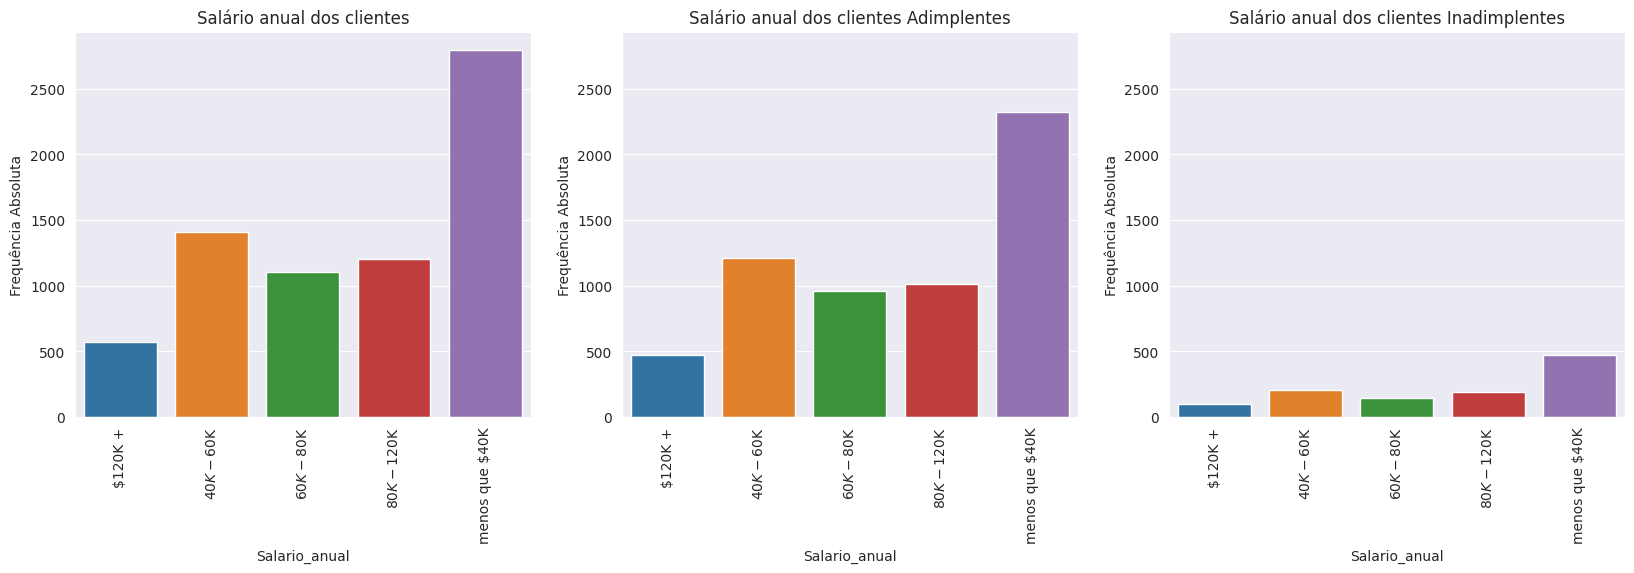

In [ ]:
coluna = 'salario_anual'
titulos = ['Salário anual dos clientes','Salário anual dos clientes Adimplentes','Salário anual dos clientes Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
figura.show()

comprando as variaveis categorias

Analisando o atributo Escolaridade:

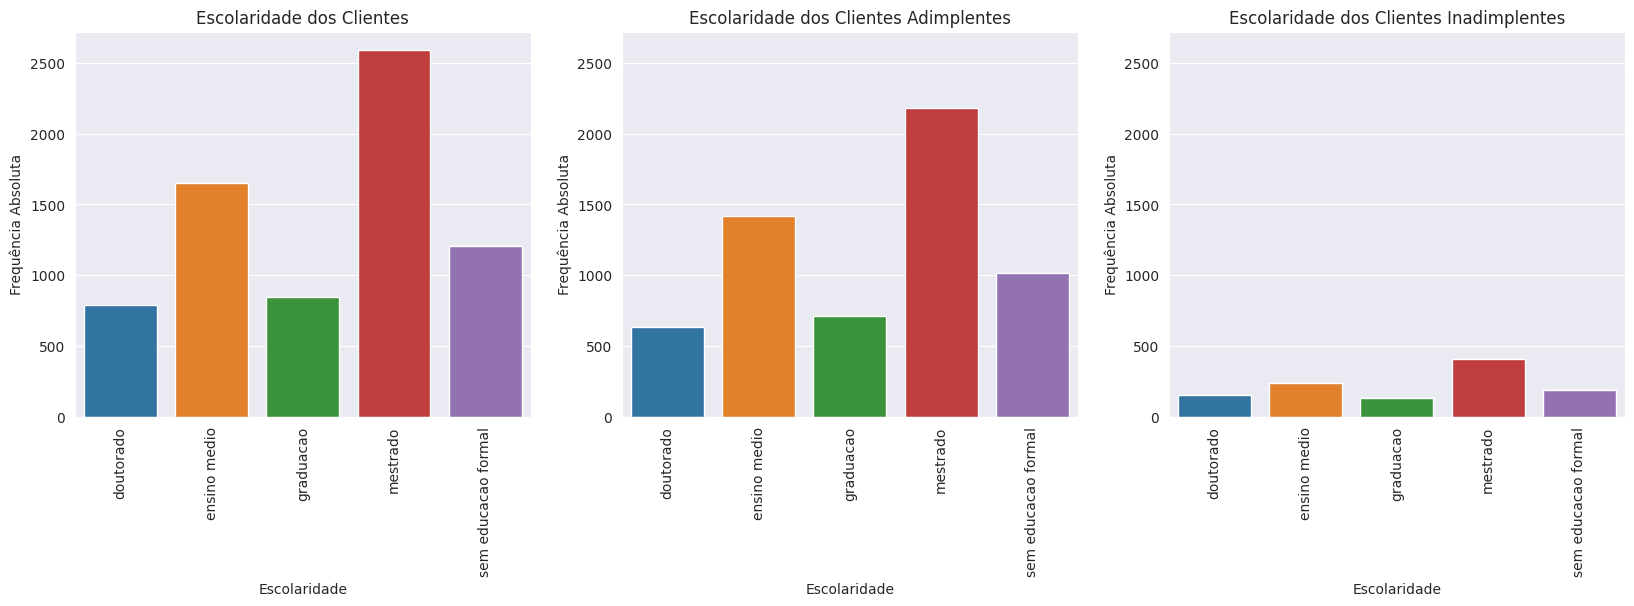

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
figura.show()


Podemos notar que o atributo escolaridade não é relevante para o objetivo do projeto, pois a distribuição se mantém semelhante nos três gráficos.

Analisando o atributo tipo_cartao:

Para esse atributo podemos verificar algo interessante, apesar de poucos clientes possuírem o cartão gold, todos são adimplentes. Não há clientes com cartão platinum na base de dados.

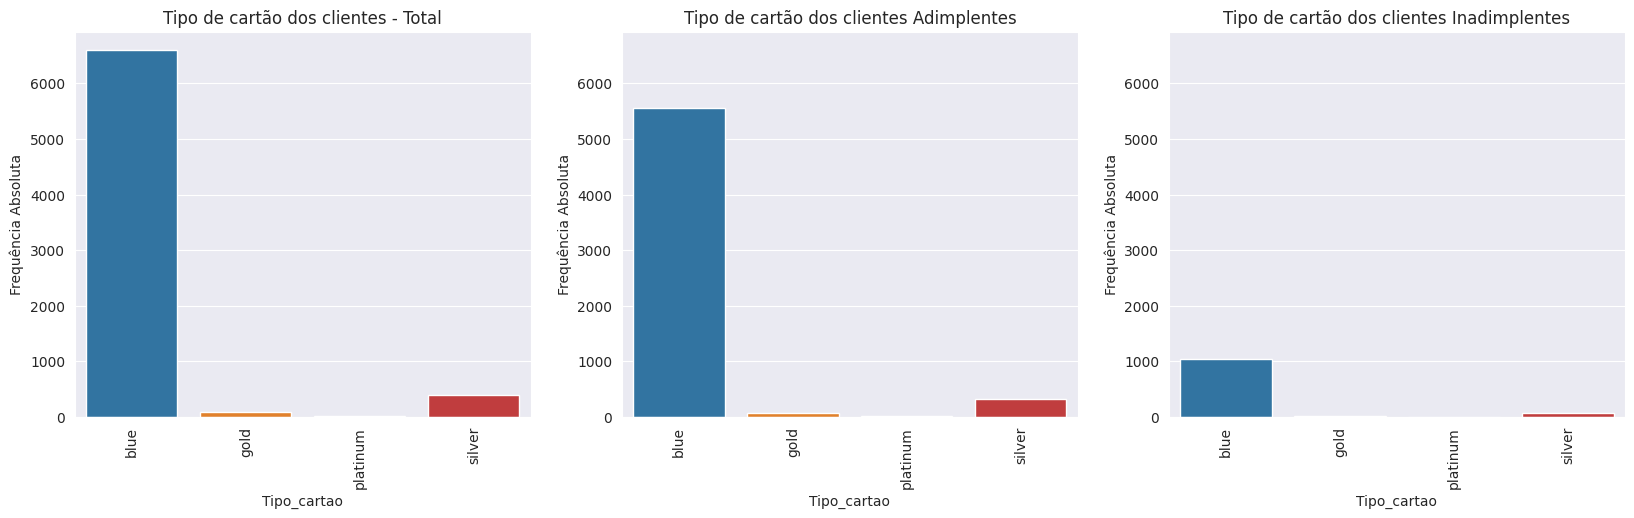

In [ ]:
# analisando o tipo do cartão

coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes - Total','Tipo de cartão dos clientes Adimplentes','Tipo de cartão dos clientes Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
figura.show()

Analisando o atributo Quantidade de Transações nos Últimos 12 Meses:

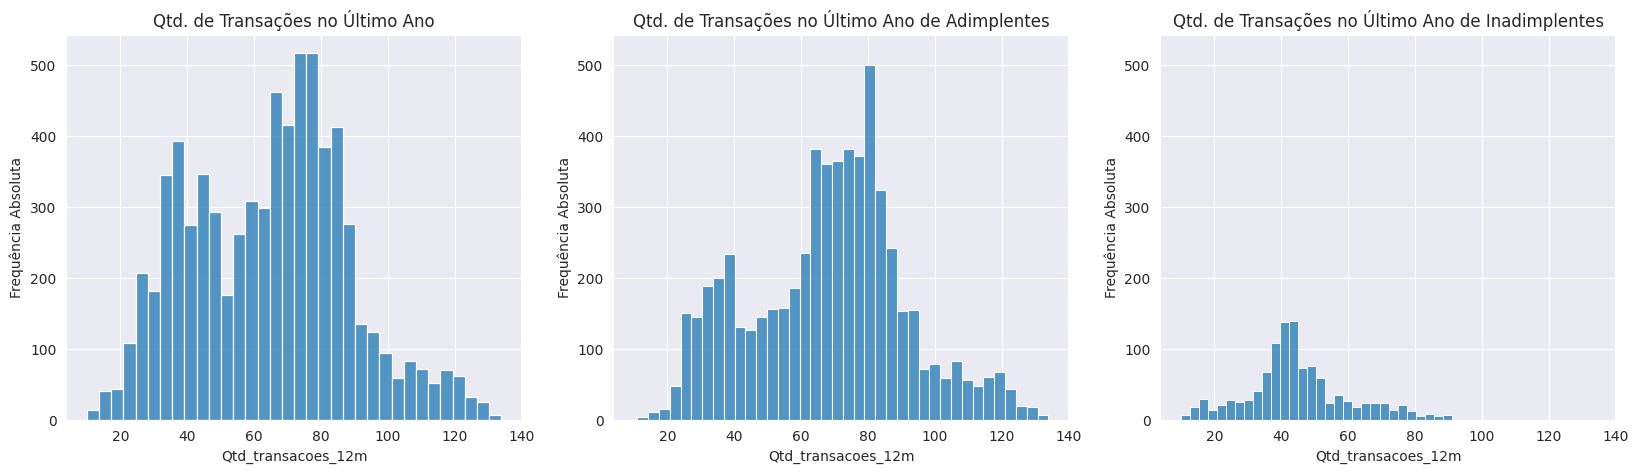

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1
figura.show()

No gráfico que representa todos os clientes, podemos notar dois picos: um em torno de 40 transações e outro em torno de 80 transações. No entanto qdo avaliamos o gráfico de adimplentes, apesar de termos os dois piscos semelhantes, o pico que ocorre em torno de 40 transações parece mais suave. E, ao avaliarmos o gráfico dos inadimplentes vemos um pico em torno de 40 transações, completanto o que falta no gráfico dos clientes adimplentes. Dessa forma podemos concluir que o atributo qtd_transacoes_12m tem relação com o obejtivo do projeto.

Verificando o atributo Valor das transações nos últimos 12 Meses

<bound method Figure.show of <Figure size 2000x500 with 3 Axes>>

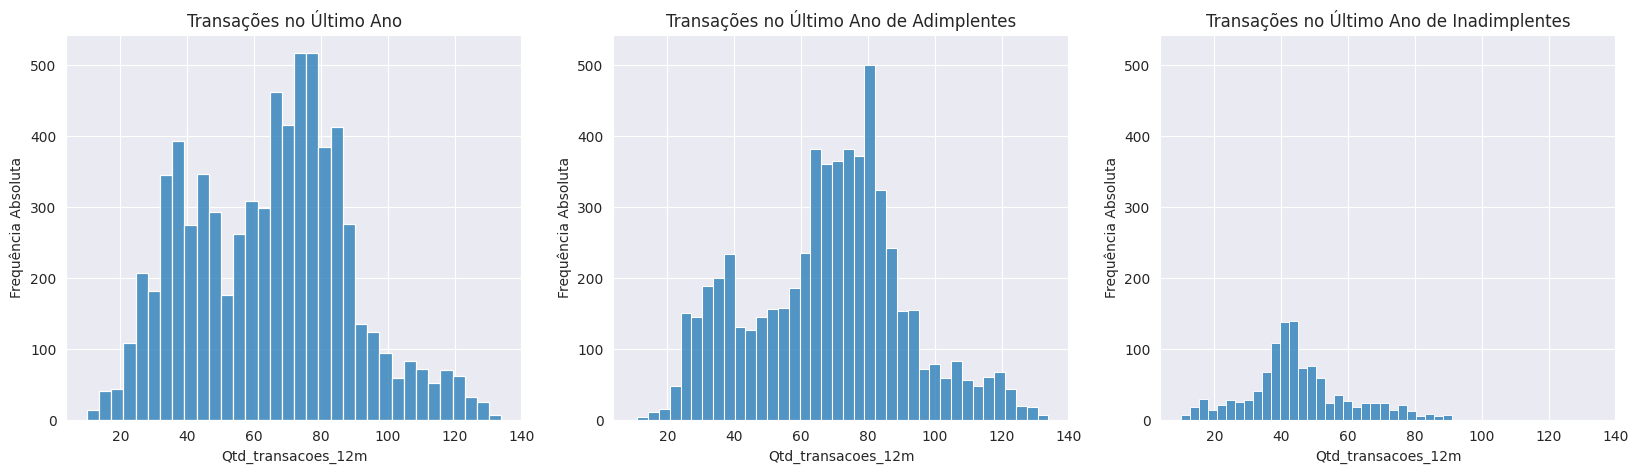

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Transações no Último Ano', 'Transações no Último Ano de Adimplentes', 'Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show

comparação valores


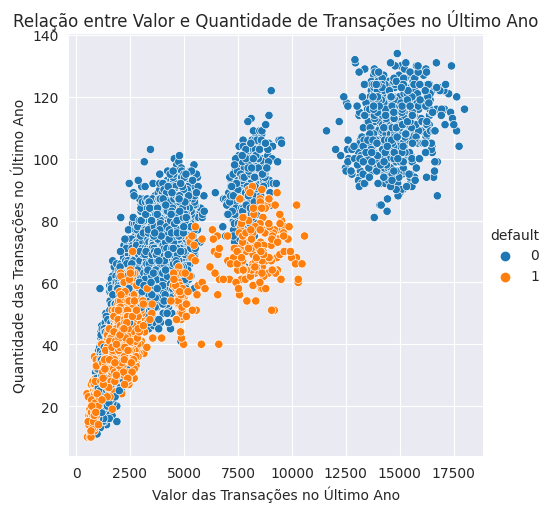

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

# Conclusão

Apesar de vários intervalos diferentes podemos notar com essa analise visual que clientes que fazem transaçoes com valor entre 6 e 10 mil por exemplo é seguro aumentar o limite até aproximadamente 4 mil. Para valores entre 3 e 4 mil o aumento pode ser maior sem risco de inadimplencia. Clientes com 90 ou mais transações ao ano o risco de inadimplencia é praticamente nulo, clientes com limite superior a 20 mil e com 90 transaçoes ou menos ao ano o risco de inadimplencia é moderado, limite superior a 34 mil aumenta para alto risco de inadimplencia